In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('GlobalLandTemperaturesByCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [12]:
df=data.copy()
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [13]:
#df=data[data['City']=='New York'].copy()
df['dt']=pd.to_datetime(df['dt'],errors='coerce')


In [14]:
df['Year']=df['dt'].dt.year

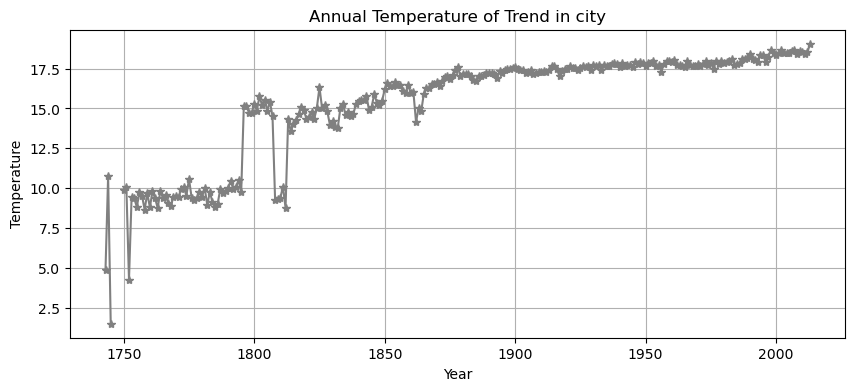

In [27]:
avg=df.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(10,4))
plt.plot(avg['Year'],avg['AverageTemperature'],linestyle='-',marker='*',color='gray')
plt.title('Annual Temperature of Trend in city')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

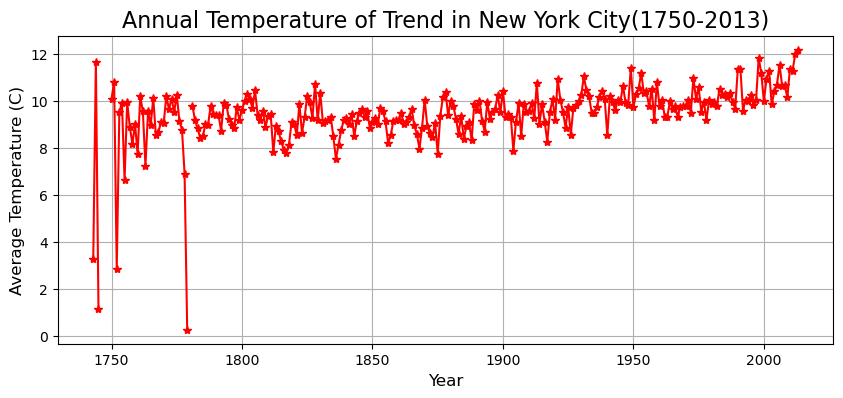

In [23]:
pf=df[df['City']=='New York'].copy()
pf['dt']=pd.to_datetime(pf['dt'],errors='coerce')
pf['Year']=pf['dt'].dt.year
avg=pf.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(10,4))
plt.plot(avg['Year'],avg['AverageTemperature'],linestyle='-',marker='*',color='red')
plt.title('Annual Temperature of Trend in New York City(1750-2013)',fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Temperature (C)',fontsize=12)
plt.grid(True)
plt.show()

In [49]:
#Which countries had highest average temperatures in the dataset
y=df.copy()


In [50]:
count=y.groupby('Country')['AverageTemperature'].mean().reset_index()
count=count.dropna()

In [51]:
top=count.sort_values(by='AverageTemperature',ascending=False).head(10)

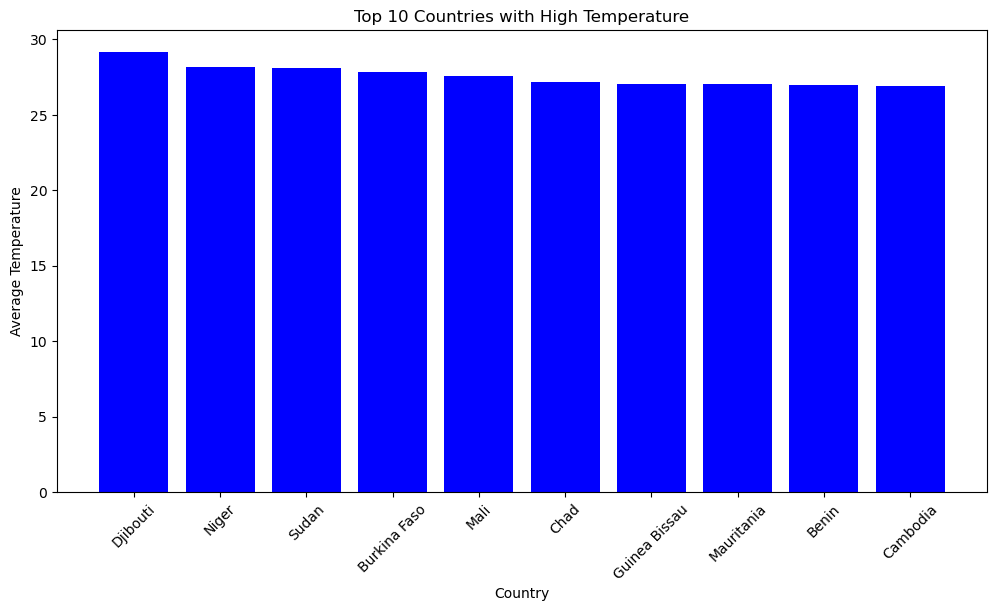

In [54]:
plt.figure(figsize=(12,6))
plt.bar(top['Country'],top['AverageTemperature'],color='blue')
plt.title('Top 10 Countries with High Temperature')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.show()

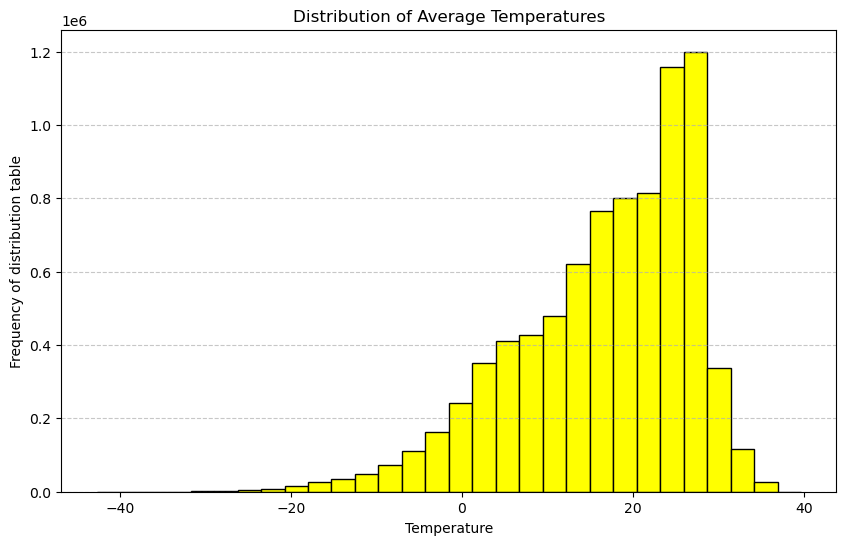

In [70]:
temp=df['AverageTemperature'].dropna()
plt.figure(figsize=(10,6))
plt.hist(temp,bins=30,color='yellow',edgecolor='black')
plt.title('Distribution of Average Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency of distribution table')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

In [90]:
data=df.copy()
data.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


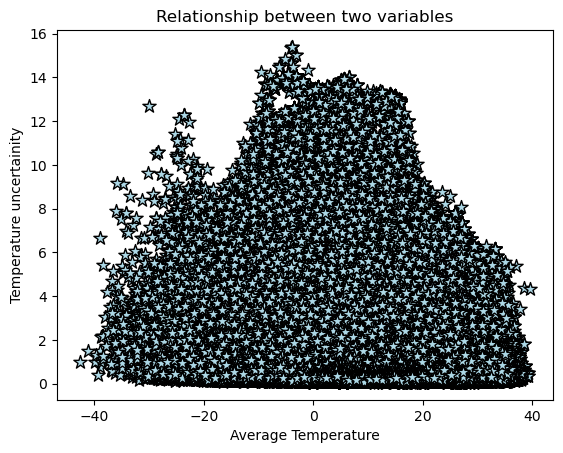

In [91]:
#Is there a correlation between temperature and uncertainity in dataset
plt.scatter(data['AverageTemperature'],data['AverageTemperatureUncertainty'],marker='*',color='lightblue',s=100,edgecolor='black')
plt.title('Relationship between two variables')
plt.xlabel('Average Temperature')
plt.ylabel('Temperature uncertainity')
plt.show()

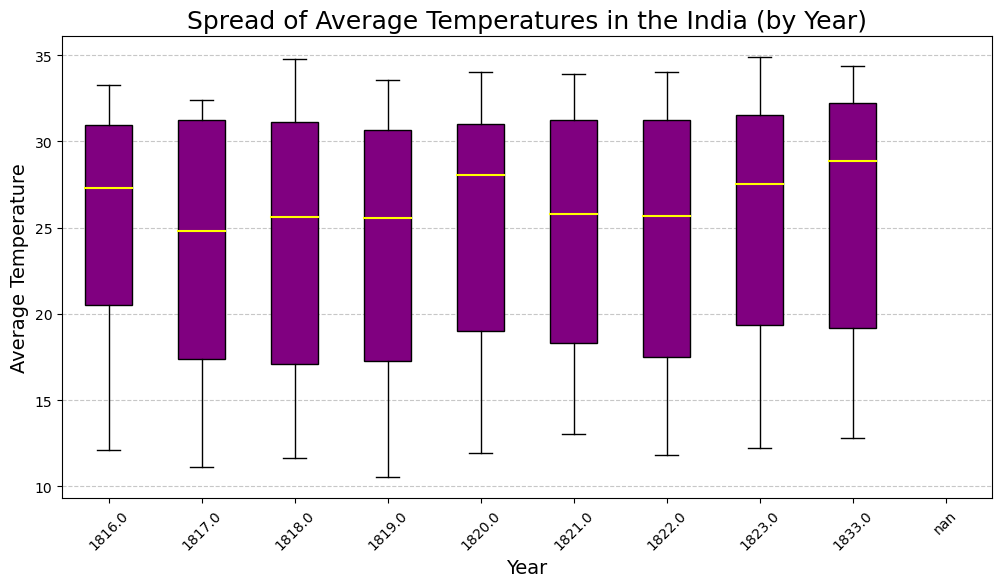

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('GlobalLandTemperaturesByCity.csv')
country_data = df[df['Country'] == 'India'].dropna()
country_data['Year'] = pd.to_datetime(country_data['dt']).dt.year.head(100)
temperature_data = country_data[['Year', 'AverageTemperature']]
plt.figure(figsize=(12, 6))
plt.boxplot(
    [temperature_data[temperature_data['Year'] == year]['AverageTemperature'] for year in temperature_data['Year'].unique()],
    labels=temperature_data['Year'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='purple', color='black'),
    medianprops=dict(color='yellow', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.5),
)
plt.title('Spread of Average Temperatures in the India (by Year)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
